In [ ]:
from pathlib import Path
import pandas as pd
from modules.features import load_company_snapshot, filter_quantum_companies

# 원본 스냅샷 파일들 찾기
data_dir = Path("/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/data/raw")
snapshot_files = sorted(data_dir.glob('Company*.dat'))

print(f"발견된 스냅샷 파일: {len(snapshot_files)}개")
for f in snapshot_files:
    print(f"  - {f.name}")

print("\n" + "="*80)

# 각 스냅샷에서 타겟 회사 찾기
target_companies = [
    'IonQ',
    'Rigetti Computing', 
    'Quantinuum',
    'QC Ware',
    'QuEra Computing',
    'Pasqal',
    'Atom Computing'
]

# 각 스냅샷별로 타겟 회사 존재 여부 확인
company_timeline = {}
for snapshot_file in snapshot_files:
    try:
        # 스냅샷 로드
        df_snapshot = load_company_snapshot(snapshot_file)
        snapshot_date = df_snapshot['snapshot_date'].iloc[0] if 'snapshot_date' in df_snapshot.columns else None
        
        # 타겟 회사 찾기
        if 'CompanyName' in df_snapshot.columns:
            name_col = 'CompanyName'
        elif 'company_name' in df_snapshot.columns:
            name_col = 'company_name'
        else:
            continue
            
        found_companies = []
        for company in target_companies:
            matches = df_snapshot[
                df_snapshot[name_col].fillna('').str.contains(company, case=False, regex=False, na=False)
            ]
            if len(matches) > 0:
                found_companies.append(company)
                if company not in company_timeline:
                    company_timeline[company] = []
                company_timeline[company].append({
                    'date': snapshot_date,
                    'file': snapshot_file.name,
                    'count': len(matches)
                })
        
        if found_companies:
            print(f"\n📅 {snapshot_file.name} ({snapshot_date}):")
            print(f"   발견된 회사: {', '.join(found_companies)}")
            
    except Exception as e:
        print(f"⚠️  {snapshot_file.name} 로드 실패: {e}")

# 타임라인 요약
print("\n" + "="*80)
print("각 회사별 스냅샷 타임라인:")
print("="*80)
for company in target_companies:
    if company in company_timeline:
        print(f"\n✓ {company}:")
        for entry in company_timeline[company]:
            print(f"  - {entry['date']} ({entry['file']}): {entry['count']}개 매칭")
    else:
        print(f"\n✗ {company}: 발견되지 않음")


In [12]:
# 표에 나온 주요 퀀텀 회사들 필터링
target_companies = [
    'IonQ',
    'Rigetti Computing',
    'Quantinuum',
    'QC Ware',
    'QuEra Computing',
    'Pasqal',
    'Atom Computing'
]

# 회사 이름 컬럼 확인
print("데이터프레임 컬럼:")
print(df_quantum.columns.tolist())
print("\n" + "="*80)

# CompanyName 컬럼이 있는지 확인하고 필터링
if 'CompanyName' in df_quantum.columns:
    name_col = 'CompanyName'
elif 'company_name' in df_quantum.columns:
    name_col = 'company_name'
elif 'Name' in df_quantum.columns:
    name_col = 'Name'
else:
    raise ValueError("회사 이름 컬럼을 찾을 수 없습니다. 사용 가능한 컬럼:", df_quantum.columns.tolist())

# 대소문자 구분 없이 필터링 (부분 일치 포함)
df_target = df_quantum[
    df_quantum[name_col].fillna('').str.lower().str.contains(
        '|'.join([name.lower() for name in target_companies]),
        case=False,
        regex=True,
        na=False
    )
].copy()

print(f"\n필터링된 회사 수: {len(df_target):,}개 (전체 {len(df_quantum):,}개 중)")
print("\n발견된 회사 목록:")
print(df_target[[name_col, 'CompanyID']].sort_values(name_col))

# 각 타겟 회사별로 매칭되는 항목 확인
print("\n" + "="*80)
print("타겟 회사별 매칭 결과:")
for company in target_companies:
    matches = df_target[df_target[name_col].fillna('').str.contains(company, case=False, regex=False, na=False)]
    if len(matches) > 0:
        print(f"✓ {company}: {len(matches)}개 매칭")
        for idx, row in matches.iterrows():
            print(f"  - {row[name_col]} (ID: {row.get('CompanyID', 'N/A')})")
    else:
        print(f"✗ {company}: 매칭되지 않음")

# 결과 데이터프레임 표시
print("\n" + "="*80)
print("필터링된 데이터:")
df_target.head(10)


데이터프레임 컬럼:
['CompanyID', 'CompanyName', 'snapshot_date', 'Description', 'Keywords', 'FirstFinancingSize', 'FirstFinancingDate', 'FirstFinancingDealType', 'LastFinancingDealType', 'LastFinancingDate', 'CompanyFinancingStatus', 'BusinessStatus', 'PrimaryContactPBId', 'Employees', 'YearFounded', 'TotalRaised', 'LastKnownValuation', 'FirstFinancingValuation']


필터링된 회사 수: 8개 (전체 1,144개 중)

발견된 회사 목록:
                                               CompanyName  CompanyID
3754403  Accelerate Quantum Computing Adoption in Qatar...  820910-26
3044051                                     Atom Computing  231917-41
2913083                                               IonQ  166679-83
3113023                                             Pasqal  279899-92
2822280                                            QC Ware  149896-18
3284635                                         Quantinuum  467591-32
3690462                                  Rigetti Computing   65891-35
3108541                                 

,CompanyID,CompanyName,snapshot_date,Description,Keywords,FirstFinancingSize,FirstFinancingDate,FirstFinancingDealType,LastFinancingDealType,LastFinancingDate,CompanyFinancingStatus,BusinessStatus,PrimaryContactPBId,Employees,YearFounded,TotalRaised,LastKnownValuation,FirstFinancingValuation
2822280,149896-18,QC Ware,2025-11-01,Developer of an enterprise software designed t...,"ai cores, computing cloud platform, enterprise...",0.030000,05/21/2015,Accelerator/Incubator,Later Stage VC,01/22/2025,Venture Capital-Backed,Generating Revenue,NaN,50.0,2014.0,33.235513,199.959910,0.600000
2913083,166679-83,IonQ,2025-11-01,IonQ Inc sells access to several quantum compu...,"application infrastructure, cloud saas, quantu...",2.000000,07/01/2016,Early Stage VC,Public Investment 2nd Offering,07/07/2025,Formerly VC-backed,Generating Revenue/Not Profitable,NaN,407.0,2015.0,1225.255138,2000.000000,7.000000
3044051,231917-41,Atom Computing,2025-11-01,Developer of quantum computers designed to pro...,"cloud solutions, quantum algorithm, quantum co...",5.000000,08/15/2018,Seed Round,Later Stage VC,04/30/2024,Venture Capital-Backed,Generating Revenue,NaN,78.0,2018.0,90.019932,250.000006,12.000000
3108541,277901-29,evolutionQ,2025-11-01,Developer of quantum-risk management strategie...,"ai in it, artificial intelligence in it, cyber...",4.313968,06/13/2022,Later Stage VC,Later Stage VC,01/31/2025,Venture Capital-Backed,Generating Revenue,NaN,32.0,2015.0,4.313968,16.416609,16.416609
3113023,279899-92,Pasqal,2025-11-01,Developer of quantum computing systems designe...,"computational processing, computing model, com...",NaN,01/01/2019,Accelerator/Incubator,Later Stage VC,06/14/2025,Venture Capital-Backed,Generating Revenue,NaN,306.0,2019.0,147.111228,593.998684,NaN
3284635,467591-32,Quantinuum,2025-11-01,Operator of a technology company intended for ...,"computing infrastructure, development toolkit,...",325.000000,11/29/2021,Joint Venture,Early Stage VC,08/21/2025,Venture Capital-Backed,Generating Revenue,NaN,550.0,2021.0,918.840299,10593.840299,325.000000
3690462,65891-35,Rigetti Computing,2025-11-01,Rigetti Computing Inc is engaged in the busine...,"ai cores, computing technology, quantum algori...",NaN,NaN,Accelerator/Incubator,Public Investment 2nd Offering,06/11/2025,Formerly VC-backed,Generating Revenue/Not Profitable,NaN,159.0,2013.0,848.561168,1500.000000,NaN
3754403,820910-26,Accelerate Quantum Computing Adoption in Qatar...,2025-11-01,Provider of investment services in quantum tec...,"financial services, financial services agency,...",NaN,05/14/2025,Joint Venture,Joint Venture,05/14/2025,Pending Transaction (M&A),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_target

,CompanyID,CompanyName,snapshot_date,Description,Keywords,FirstFinancingSize,FirstFinancingDate,FirstFinancingDealType,LastFinancingDealType,LastFinancingDate,CompanyFinancingStatus,BusinessStatus,PrimaryContactPBId,Employees,YearFounded,TotalRaised,LastKnownValuation,FirstFinancingValuation
2822280,149896-18,QC Ware,2025-11-01,Developer of an enterprise software designed t...,"ai cores, computing cloud platform, enterprise...",0.030000,05/21/2015,Accelerator/Incubator,Later Stage VC,01/22/2025,Venture Capital-Backed,Generating Revenue,NaN,50.0,2014.0,33.235513,199.959910,0.600000
2913083,166679-83,IonQ,2025-11-01,IonQ Inc sells access to several quantum compu...,"application infrastructure, cloud saas, quantu...",2.000000,07/01/2016,Early Stage VC,Public Investment 2nd Offering,07/07/2025,Formerly VC-backed,Generating Revenue/Not Profitable,NaN,407.0,2015.0,1225.255138,2000.000000,7.000000
3044051,231917-41,Atom Computing,2025-11-01,Developer of quantum computers designed to pro...,"cloud solutions, quantum algorithm, quantum co...",5.000000,08/15/2018,Seed Round,Later Stage VC,04/30/2024,Venture Capital-Backed,Generating Revenue,NaN,78.0,2018.0,90.019932,250.000006,12.000000
3108541,277901-29,evolutionQ,2025-11-01,Developer of quantum-risk management strategie...,"ai in it, artificial intelligence in it, cyber...",4.313968,06/13/2022,Later Stage VC,Later Stage VC,01/31/2025,Venture Capital-Backed,Generating Revenue,NaN,32.0,2015.0,4.313968,16.416609,16.416609
3113023,279899-92,Pasqal,2025-11-01,Developer of quantum computing systems designe...,"computational processing, computing model, com...",NaN,01/01/2019,Accelerator/Incubator,Later Stage VC,06/14/2025,Venture Capital-Backed,Generating Revenue,NaN,306.0,2019.0,147.111228,593.998684,NaN
3284635,467591-32,Quantinuum,2025-11-01,Operator of a technology company intended for ...,"computing infrastructure, development toolkit,...",325.000000,11/29/2021,Joint Venture,Early Stage VC,08/21/2025,Venture Capital-Backed,Generating Revenue,NaN,550.0,2021.0,918.840299,10593.840299,325.000000
3690462,65891-35,Rigetti Computing,2025-11-01,Rigetti Computing Inc is engaged in the busine...,"ai cores, computing technology, quantum algori...",NaN,NaN,Accelerator/Incubator,Public Investment 2nd Offering,06/11/2025,Formerly VC-backed,Generating Revenue/Not Profitable,NaN,159.0,2013.0,848.561168,1500.000000,NaN
3754403,820910-26,Accelerate Quantum Computing Adoption in Qatar...,2025-11-01,Provider of investment services in quantum tec...,"financial services, financial services agency,...",NaN,05/14/2025,Joint Venture,Joint Venture,05/14/2025,Pending Transaction (M&A),NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_95099/1699083560.py:59: 

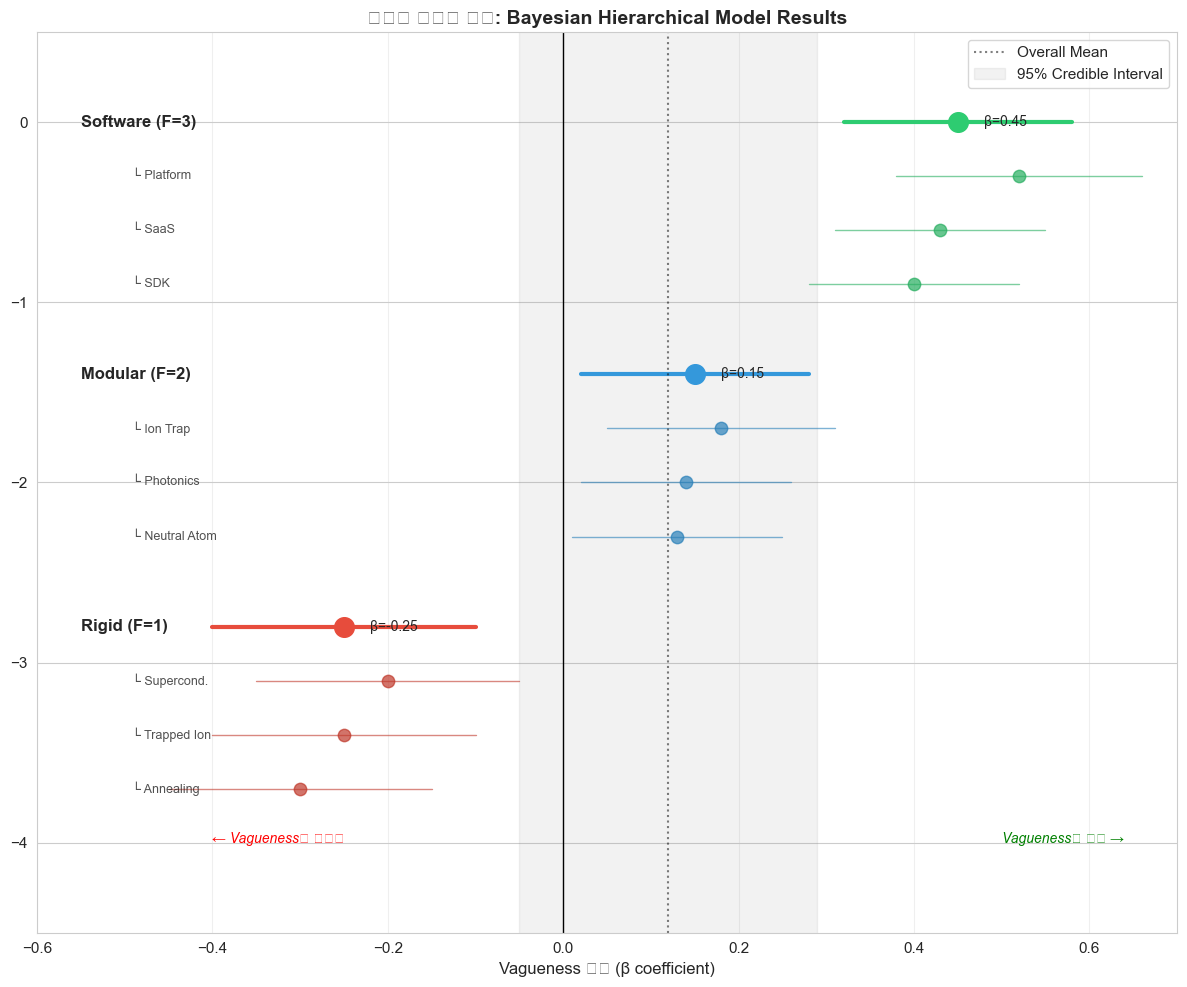

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))

# 계층적 데이터 구조
industries = {
    'Software (F=3)': {
        'mean': 0.45, 'ci': [0.32, 0.58],
        'subcategories': ['Platform', 'SaaS', 'SDK'],
        'submeans': [0.52, 0.43, 0.40],
        'subcis': [[0.38, 0.66], [0.31, 0.55], [0.28, 0.52]]
    },
    'Modular (F=2)': {
        'mean': 0.15, 'ci': [0.02, 0.28],
        'subcategories': ['Ion Trap', 'Photonics', 'Neutral Atom'],
        'submeans': [0.18, 0.14, 0.13],
        'subcis': [[0.05, 0.31], [0.02, 0.26], [0.01, 0.25]]
    },
    'Rigid (F=1)': {
        'mean': -0.25, 'ci': [-0.40, -0.10],
        'subcategories': ['Supercond.', 'Trapped Ion', 'Annealing'],
        'submeans': [-0.20, -0.25, -0.30],
        'subcis': [[-0.35, -0.05], [-0.40, -0.10], [-0.45, -0.15]]
    }
}

y_position = 0
colors_main = ['#2ecc71', '#3498db', '#e74c3c']
colors_sub = ['#27ae60', '#2980b9', '#c0392b']

for (industry, data), col_main, col_sub in zip(industries.items(), colors_main, colors_sub):
    # 메인 산업 효과
    ax.plot(data['ci'], [y_position, y_position], color=col_main, linewidth=3)
    ax.scatter(data['mean'], y_position, s=200, color=col_main, zorder=5)
    ax.text(-0.55, y_position, industry, fontsize=12, fontweight='bold', va='center')
    ax.text(data['mean'] + 0.03, y_position, f"β={data['mean']:.2f}", fontsize=10, va='center')
    
    # 세부 카테고리
    for subcat, submean, subci in zip(data['subcategories'], data['submeans'], data['subcis']):
        y_position -= 0.3
        ax.plot(subci, [y_position, y_position], color=col_sub, linewidth=1, alpha=0.6)
        ax.scatter(submean, y_position, s=80, color=col_sub, alpha=0.7, zorder=4)
        ax.text(-0.5, y_position, f"  └ {subcat}", fontsize=9, va='center', alpha=0.8)
    
    y_position -= 0.5

# 전체 평균 (Hierarchical Prior)
ax.axvline(x=0.12, color='black', linestyle=':', alpha=0.5, label='Overall Mean')
ax.fill_betweenx([-5, 1], -0.05, 0.29, alpha=0.1, color='gray', label='95% Credible Interval')

ax.axvline(x=0, color='black', linewidth=1)
ax.set_xlim(-0.6, 0.7)
ax.set_ylim(-4.5, 0.5)
ax.set_xlabel('Vagueness 효과 (β coefficient)', fontsize=12)
ax.set_title('산업별 계층적 효과: Bayesian Hierarchical Model Results', fontsize=14, fontweight='bold')
ax.text(0.5, -4, 'Vagueness가 도움 →', fontsize=10, style='italic', color='green')
ax.text(-0.4, -4, '← Vagueness가 해로움', fontsize=10, style='italic', color='red')

ax.grid(True, axis='x', alpha=0.3)
ax.legend(loc='upper right')
plt.tight_layout()

# 🧪 Pipeline Components Testing Notebook

This notebook allows you to interactively test each stage of the multiverse analysis pipeline.

## Pipeline Stages
1. **🏗️ BUILD**: Load and consolidate .dat files
2. **🧠 DEFINE**: Engineer core variables (E, L, V, F, S)
3. **📊 PLOT1**: Visualize variable distributions
4. **⚖️ TEST**: Test hypotheses
5. **📈 PLOT2**: Multiverse visualization

---

In [2]:
# Setup: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add modules to path
sys.path.insert(0, str(Path.cwd()))

from modules import features, models, plots

# Configure display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print("✅ Setup complete!")

✅ Setup complete!


---
## Stage 1: 🏗️ BUILD - Data Loading

Test the data consolidation from .dat files with parquet caching.

**Expected behavior:**
- First run: Slow (~40-60s) - reads from .dat files
- Second run: Fast (~2-3s) - reads from cache

In [3]:
import sys, importlib.util, pandas as pd
print(sys.executable)
print(importlib.util.find_spec("pyarrow"))
pd.read_parquet("data/processed/consolidated_companies_2022_2024_2025.parquet").head()

/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/bin/python
ModuleSpec(name='pyarrow', loader=<_frozen_importlib_external.SourceFileLoader object at 0x10c1c3f50>, origin='/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.13/site-packages/pyarrow/__init__.py', submodule_search_locations=['/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.13/site-packages/pyarrow'])


,CompanyID,CompanyName,CompanyFormerName,CompanyAlsoKnownAs,CompanyLegalName,Description,Keywords,TotalRaised,BusinessStatus,OwnershipStatus,CompanyFinancingStatus,Universe,Website,Employees,Exchange,Ticker,CikCode,YearFounded,ParentCompany,FinancingStatusNote,HQLocation,HQAddressLine1,HQAddressLine2,HQCity,HQState_Province,...,GrowthRateChange,GrowthRatePercentChange,WebGrowthRate,WebGrowthRatePercentile,SocialGrowthRate,SocialGrowthRatePercentile,TwitterGrowthRate,TwitterGrowthRatePercentile,SizeMultiple,SizeMultiplePercentile,SizeMultipleChange,SizeMultiplePercentChange,WebSizeMultiple,WebSizeMultiplePercentile,SocialSizeMultiple,SocialSizeMultiplePercentile,TwitterSizeMultiple,TwitterSizeMultiplePercentile,TwitterFollowers,TwitterFollowersChange,TwitterFollowersPercentChange,ProfileDataSource,PitchBookProfileLink,LastUpdated,snapshot_date
0,100000-00,Reed Exhibitions (Food Services Events Operati...,None,None,None,Organizer of food services events. The company...,"business service, food services",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,reedexhibitions.co.uk,7.0,None,None,NaN,1988.0,Urban Exposure,The Food Services Events Operations of Reed Ex...,"Richmond, United Kingdom",Gateway House,28 The Quadrant,Richmond,England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
1,100000-09,Andriscos,None,None,Andriscos SAS,Provider of real estate services. The company ...,"building operator, real estate, real estate br...",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,None,NaN,None,None,NaN,2007.0,None,The Andriscos unit of ECH 2 Andriscos I was ac...,"Paris, France","181, avenue Charles de Gaulle",Neuilly-sur-Seine,Paris,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
2,100000-27,SIS Resources,None,Green Smoke,SIS Resources Ltd.,Manufacturer of electronic cigarettes based in...,"e-cigarette, e-vapor, electronic cigarettes, e...",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,www.greensmoke.com,NaN,None,None,NaN,2008.0,None,The company was acquired by Nu Mark for $110 m...,"Miami, FL",603 West Broad Street,None,Miami,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
3,100000-54,Jade Dynasty Holdings,None,None,Jade Dynasty Holdings Ltd.,Provider of a publishing company. The company ...,"comics, comics publication, publishing company",12.574001,Profitable,Acquired/Merged,Corporate Backed or Acquired,M&A,None,NaN,None,None,NaN,NaN,None,Jade Sparkle Holdings sold 40% of the stake in...,British Virgin Islands,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
4,100000-63,Sandvik Nora,Hagby Bruk,None,Sandvik Nora AB,Manufacturer and seller of diamond tools and m...,"diamond cutting, diamond cutting tools, diamon...",NaN,Profitable,Acquired/Merged,Corporate Backed or Acquired,M&A,www.hagby.se,75.0,None,None,NaN,1960.0,Sandvik,The company was acquired by Husqvarna (STO: HU...,"Nora, Sweden",Box 4,None,Nora,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01


In [4]:
%%time
# Test BUILD stage with selective year loading
data_dir = 'data/raw'
years_to_load = [2022, 2024, 2025]  # Only load these years

print(f"Loading data from {data_dir} for years: {years_to_load}")
print("-" * 80)

df = features.consolidate_company_snapshots(
    data_dir=data_dir,
    use_cache=True,       # Use parquet cache if available
    save_parquet=True,    # Save cache for future runs
    years=years_to_load   # Selective loading
)

print("\n✅ BUILD Stage Complete!")
print(f"\n📊 Data Summary:")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   Memory: {df.memory_usage(deep=True).sum() / 1e6:.1f} MB")
print(f"   Date range: {df['snapshot_date'].min()} to {df['snapshot_date'].max()}")

Loading data from data/raw for years: [2022, 2024, 2025]
--------------------------------------------------------------------------------

✅ BUILD Stage Complete!

📊 Data Summary:
   Rows: 1,247,024
   Columns: 95
   Memory: 4484.5 MB
   Date range: 2022-01-01 00:00:00 to 2025-11-01 00:00:00
CPU times: user 15.2 s, sys: 2.05 s, total: 17.2 s
Wall time: 15.4 s


In [6]:
from pathlib import Path
from modules.features import create_quantum_dataset

DATA_DIR = Path("/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/data/raw")
OUTPUT_PATH = DATA_DIR / "consolidated_companies_2022_2024_2025_quantum.parquet"

# 필요하면 연도 필터 지정 (예: years=[2022, 2024, 2025])
df_quantum = create_quantum_dataset(
    data_dir=DATA_DIR,
    output_path=OUTPUT_PATH,
    years=None  # 전체 연도를 사용하려면 None
)

print(f"저장 완료: {OUTPUT_PATH} ({len(df_quantum):,}개 기업)")
df_quantum.head()

저장 완료: /Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/data/raw/consolidated_companies_2022_2024_2025_quantum.parquet (1,144개 기업)


,CompanyID,CompanyName,snapshot_date,Description,Keywords,FirstFinancingSize,FirstFinancingDate,FirstFinancingDealType,LastFinancingDealType,LastFinancingDate,CompanyFinancingStatus,BusinessStatus,PrimaryContactPBId,Employees,YearFounded,TotalRaised,LastKnownValuation,FirstFinancingValuation
2623290,1001503-36,Chromopic,2025-11-01,Developer of application-specific photonic int...,"embedded systems, engineering services, high f...",NaN,09/01/2025,Early Stage VC,Early Stage VC,09/01/2025,Venture Capital-Backed,Startup,NaN,NaN,2024.0,NaN,NaN,NaN
2624355,1002492-82,Quantum Resolve Solutions,2025-11-01,The company primarily operates in the Educatio...,NaN,NaN,NaN,NaN,NaN,NaN,Corporation,NaN,NaN,NaN,2023.0,NaN,NaN,NaN
2625174,100326-61,Designer Carbon Materials,2025-11-01,Developer of carbon nanomaterials designed to ...,"carbon nanomaterial, carbon nanomaterial produ...",NaN,03/14/2014,University Spin-Out,Later Stage VC,08/11/2022,Venture Capital-Backed,Generating Revenue,NaN,NaN,2014.0,0.32049,1.084488,NaN
2627659,100560-16,Atomnaut,2025-11-01,Developer of a 3D atomic resolution microscope...,"3d microscope, alloy metal, atomic imaging, de...",0.005,03/31/2015,Accelerator/Incubator,Accelerator/Incubator,06/06/2023,Accelerator/Incubator Backed,Generating Revenue,NaN,4.0,2015.0,0.00500,NaN,NaN
2628494,1006419-25,Quantum Air Conditioning,2025-11-01,The company primarily operates in the Commerci...,NaN,NaN,NaN,NaN,NaN,NaN,Corporation,NaN,NaN,NaN,2023.0,NaN,NaN,NaN


In [7]:
# 필터링된 결과를 parquet 파일로 저장
output_path_target = Path("/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/data/raw/consolidated_companies_2022_2024_2025_quantum_target.parquet")
df_target.to_parquet(output_path_target, index=False)
print(f"\n저장 완료: {output_path_target} ({len(df_target):,}개 회사)")

NameError: name 'df_target' is not defined

In [5]:
# Inspect first few rows
print("Sample data (first 5 rows):")
df.head()

Sample data (first 5 rows):


,CompanyID,CompanyName,CompanyFormerName,CompanyAlsoKnownAs,CompanyLegalName,Description,Keywords,TotalRaised,BusinessStatus,OwnershipStatus,CompanyFinancingStatus,Universe,Website,Employees,Exchange,Ticker,CikCode,YearFounded,ParentCompany,FinancingStatusNote,HQLocation,HQAddressLine1,HQAddressLine2,HQCity,HQState_Province,...,GrowthRateChange,GrowthRatePercentChange,WebGrowthRate,WebGrowthRatePercentile,SocialGrowthRate,SocialGrowthRatePercentile,TwitterGrowthRate,TwitterGrowthRatePercentile,SizeMultiple,SizeMultiplePercentile,SizeMultipleChange,SizeMultiplePercentChange,WebSizeMultiple,WebSizeMultiplePercentile,SocialSizeMultiple,SocialSizeMultiplePercentile,TwitterSizeMultiple,TwitterSizeMultiplePercentile,TwitterFollowers,TwitterFollowersChange,TwitterFollowersPercentChange,ProfileDataSource,PitchBookProfileLink,LastUpdated,snapshot_date
0,100000-00,Reed Exhibitions (Food Services Events Operati...,None,None,None,Organizer of food services events. The company...,"business service, food services",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,reedexhibitions.co.uk,7.0,None,None,NaN,1988.0,Urban Exposure,The Food Services Events Operations of Reed Ex...,"Richmond, United Kingdom",Gateway House,28 The Quadrant,Richmond,England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
1,100000-09,Andriscos,None,None,Andriscos SAS,Provider of real estate services. The company ...,"building operator, real estate, real estate br...",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,None,NaN,None,None,NaN,2007.0,None,The Andriscos unit of ECH 2 Andriscos I was ac...,"Paris, France","181, avenue Charles de Gaulle",Neuilly-sur-Seine,Paris,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
2,100000-27,SIS Resources,None,Green Smoke,SIS Resources Ltd.,Manufacturer of electronic cigarettes based in...,"e-cigarette, e-vapor, electronic cigarettes, e...",NaN,Generating Revenue,Acquired/Merged,Corporate Backed or Acquired,M&A,www.greensmoke.com,NaN,None,None,NaN,2008.0,None,The company was acquired by Nu Mark for $110 m...,"Miami, FL",603 West Broad Street,None,Miami,Florida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
3,100000-54,Jade Dynasty Holdings,None,None,Jade Dynasty Holdings Ltd.,Provider of a publishing company. The company ...,"comics, comics publication, publishing company",12.574001,Profitable,Acquired/Merged,Corporate Backed or Acquired,M&A,None,NaN,None,None,NaN,NaN,None,Jade Sparkle Holdings sold 40% of the stake in...,British Virgin Islands,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01
4,100000-63,Sandvik Nora,Hagby Bruk,None,Sandvik Nora AB,Manufacturer and seller of diamond tools and m...,"diamond cutting, diamond cutting tools, diamon...",NaN,Profitable,Acquired/Merged,Corporate Backed or Acquired,M&A,www.hagby.se,75.0,None,None,NaN,1960.0,Sandvik,The company was acquired by Husqvarna (STO: HU...,"Nora, Sweden",Box 4,None,Nora,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,https://content.pitchbook.com/profiles/company...,09/01/2025,2025-11-01


In [6]:
# Check column names
print("Available columns:")
print(df.columns.tolist())

Available columns:
['CompanyID', 'CompanyName', 'CompanyFormerName', 'CompanyAlsoKnownAs', 'CompanyLegalName', 'Description', 'Keywords', 'TotalRaised', 'BusinessStatus', 'OwnershipStatus', 'CompanyFinancingStatus', 'Universe', 'Website', 'Employees', 'Exchange', 'Ticker', 'CikCode', 'YearFounded', 'ParentCompany', 'FinancingStatusNote', 'HQLocation', 'HQAddressLine1', 'HQAddressLine2', 'HQCity', 'HQState_Province', 'HQPostCode', 'HQCountry', 'HQPhone', 'HQFax', 'HQEmail', 'HQGlobalRegion', 'HQGlobalSubRegion', 'AlternateOfficeCount', 'PrimaryContactPBId', 'PrimaryContact', 'PrimaryContactTitle', 'ActiveInvestors', 'FormerInvestors', 'FirstFinancingDate', 'FirstFinancingSize', 'FirstFinancingSizeStatus', 'FirstFinancingValuation', 'FirstFinancingValuationStatus', 'FirstFinancingDealType', 'FirstFinancingDealType2', 'FirstFinancingDealType3', 'FirstFinancingDealClass', 'FirstFinancingDebt', 'FirstFinancingStatus', 'LastKnownValuation', 'LastKnownValuationDate', 'LastKnownValuationDealTy

---
## Stage 2: 🧠 DEFINE - Feature Engineering

Test creation of core variables:
- 🧧 **E** (early_funding_musd): First financing size
- 💰 **L** (growth): Series B+ achievement
- 🤙 **V** (z_vagueness): Standardized vagueness score
- 💪 **F** (is_hardware): Hardware indicator
- **sector_fe**: Sector fixed effects

In [7]:
%%time
# Test feature engineering
print("Engineering features...")
print("-" * 80)

df_features = features.engineer_features(df.copy())

print("\n✅ Feature engineering complete!")
print(f"\n📊 New columns created:")
new_cols = set(df_features.columns) - set(df.columns)
for col in sorted(new_cols):
    print(f"   ✓ {col}")

Engineering features...
--------------------------------------------------------------------------------
  ℹ️  Early funding filtered to Series A / Early Stage VC: 100,932 of 1,247,024 companies
  ✅ Growth variable created: 49,997 companies with Series B+ (4.0%)
  ✅ Sector FE created: 8 sectors

✅ Feature engineering complete!

📊 New columns created:
   ✓ description
   ✓ early_funding_musd
   ✓ employees
   ✓ employees_log
   ✓ firm_age
   ✓ first_financing_deal_type
   ✓ first_financing_size
   ✓ growth
   ✓ is_hardware
   ✓ keywords
   ✓ last_financing_deal_type
   ✓ sector_fe
   ✓ total_raised
   ✓ vagueness
   ✓ year_founded
CPU times: user 1min 23s, sys: 1.86 s, total: 1min 25s
Wall time: 1min 26s


In [8]:
# Test preprocessing for hypothesis testing
print("Preprocessing for hypothesis testing...")
print("-" * 80)

df_processed = features.preprocess_for_h2(df_features.copy())

print("\n✅ Preprocessing complete!")
print(f"\n📊 Final columns:")
print(f"   Total: {len(df_processed.columns)}")

Preprocessing for hypothesis testing...
--------------------------------------------------------------------------------
  ⚠️  founder_credibility not found. Created founder_serial=0 for all rows.

✅ Preprocessing complete!

📊 Final columns:
   Total: 106


In [9]:
# Check core variable statistics
print("Core Variables Summary:")
print("=" * 80)

# E: Early funding
if 'early_funding_musd' in df_processed.columns:
    early = df_processed['early_funding_musd'].dropna()
    print(f"\n🧧 E (early_funding_musd):")
    print(f"   Count: {len(early):,}")
    print(f"   Mean: ${early.mean():.2f}M")
    print(f"   Median: ${early.median():.2f}M")
    print(f"   Std: ${early.std():.2f}M")

# L: Growth
if 'growth' in df_processed.columns:
    growth_rate = df_processed['growth'].mean() * 100
    n_growth = df_processed['growth'].notna().sum()
    print(f"\n💰 L (growth):")
    print(f"   Count: {n_growth:,}")
    print(f"   Growth rate: {growth_rate:.1f}%")
    print(f"   Series B+ companies: {df_processed['growth'].sum():,}")

# V: Vagueness
if 'z_vagueness' in df_processed.columns:
    vague = df_processed['z_vagueness'].dropna()
    print(f"\n🤙 V (z_vagueness):")
    print(f"   Count: {len(vague):,}")
    print(f"   Mean: {vague.mean():.3f} (should be ~0 for standardized)")
    print(f"   Std: {vague.std():.3f} (should be ~1 for standardized)")

# F: Hardware
if 'is_hardware' in df_processed.columns:
    hw_pct = df_processed['is_hardware'].mean() * 100
    print(f"\n💪 F (is_hardware):")
    print(f"   Count: {df_processed['is_hardware'].notna().sum():,}")
    print(f"   Hardware companies: {hw_pct:.1f}%")
    print(f"   Software companies: {100-hw_pct:.1f}%")

# Sector FE
if 'sector_fe' in df_processed.columns:
    sectors = df_processed['sector_fe'].value_counts()
    print(f"\n🏢 Sector FE:")
    print(f"   Total sectors: {len(sectors)}")
    print(f"\n   Top 5 sectors:")
    for sector, count in sectors.head(5).items():
        pct = count / len(df_processed) * 100
        print(f"      {sector}: {count:,} ({pct:.1f}%)")

Core Variables Summary:

🧧 E (early_funding_musd):
   Count: 44,728
   Mean: $0.00M
   Median: $0.00M
   Std: $0.00M

💰 L (growth):
   Count: 1,247,024
   Growth rate: 4.0%
   Series B+ companies: 49,997

🤙 V (z_vagueness):
   Count: 1,247,024
   Mean: -0.000 (should be ~0 for standardized)
   Std: 1.000 (should be ~1 for standardized)

💪 F (is_hardware):
   Count: 1,247,024
   Hardware companies: 10.3%
   Software companies: 89.7%

🏢 Sector FE:
   Total sectors: 8

   Top 5 sectors:
      Other: 778,988 (62.5%)
      AI/ML Software: 212,223 (17.0%)
      Biotech/Healthcare: 119,716 (9.6%)
      Hardware/Robotics: 45,774 (3.7%)
      Consumer Software: 30,262 (2.4%)


---
## Stage 3: 📊 PLOT1 - Variable Distributions

Test visualization of core variables.

Creating variable distribution plots...
--------------------------------------------------------------------------------


/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/modules/plots.py:1501: UserWarning: Glyph 129511 (\N{RED GIFT ENVELOPE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/modules/plots.py:1501: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/modules/plots.py:1501: UserWarning: Glyph 129305 (\N{CALL ME HAND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/modules/plots.py:1501: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/modules/plots.py:1501: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strat

  ✓ Saved: results/test_variable_distributions.png

✅ Distribution plots saved to: results/test_variable_distributions.png


/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129511 (\N{RED GIFT ENVELOPE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129305 (\N{CALL ME HAND}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/hyunjimoon/tolzul/Front/On/love(cs)/strategic_ambiguity/empirics/myenv

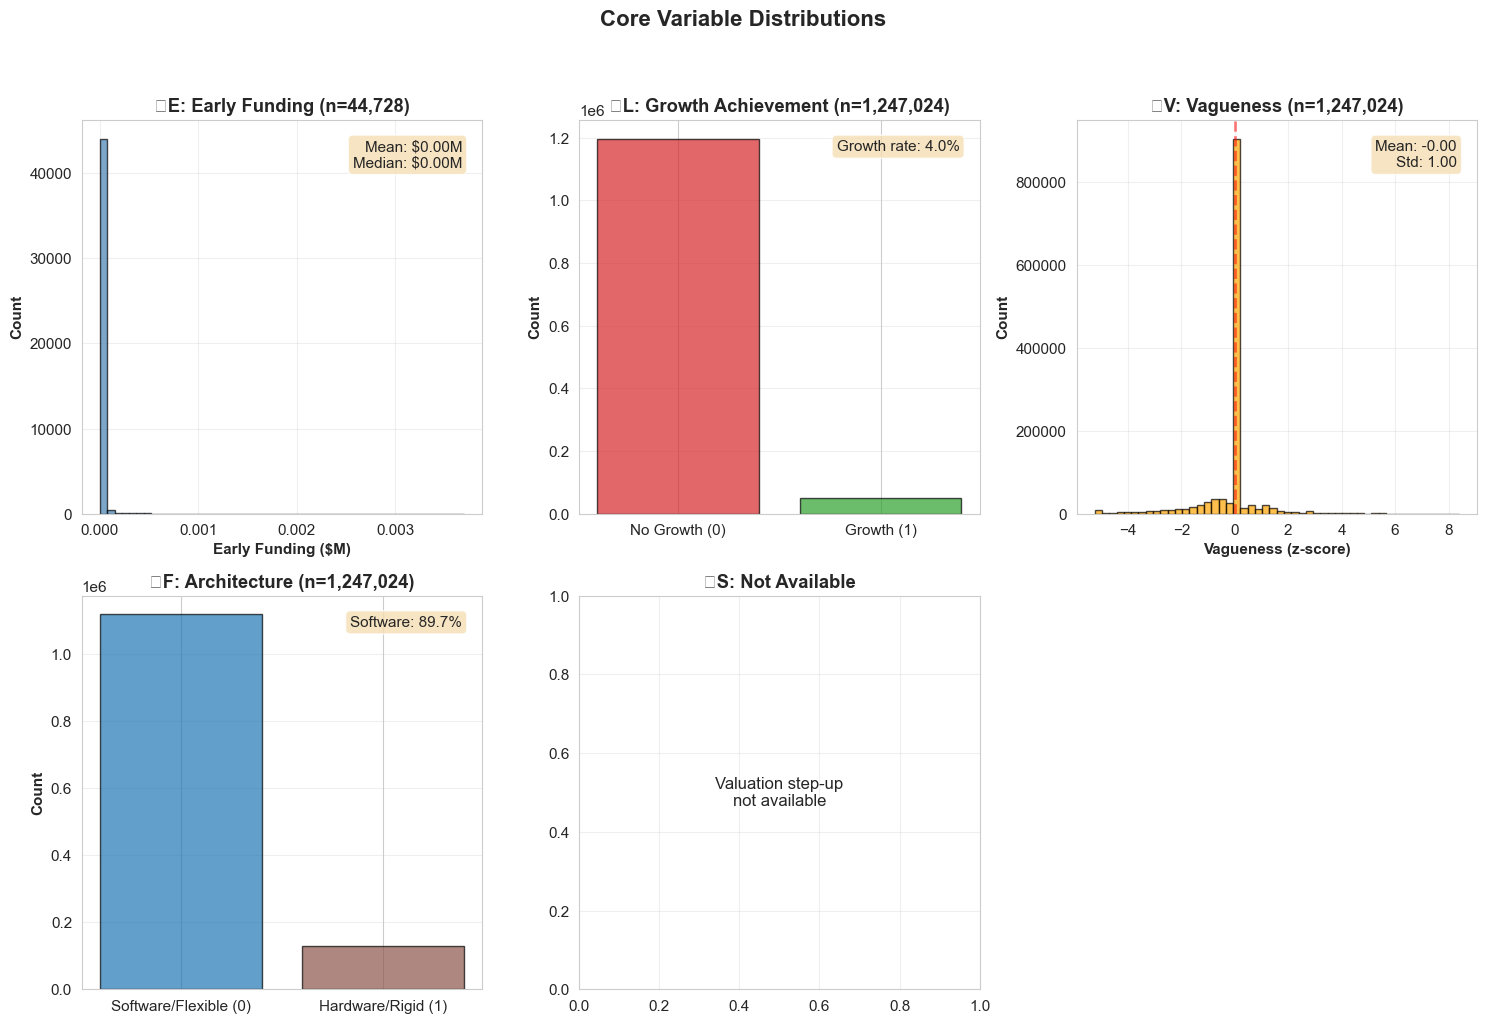

In [10]:
# Test distribution plotting
output_path = Path('results') / 'test_variable_distributions.png'
output_path.parent.mkdir(exist_ok=True)

print("Creating variable distribution plots...")
print("-" * 80)

plots.plot_variable_distributions(
    df_processed,
    output_path=output_path
)

print(f"\n✅ Distribution plots saved to: {output_path}")

In [ ]:
# Display the plot inline
from IPython.display import Image
Image(str(output_path), width=900)

---
## Stage 4: ⚖️ TEST - Hypothesis Testing

Test the three core hypotheses:
- **H1 (🧧E🤙V)**: Early Funding ~ Vagueness (expect β < 0)
- **H2 Main (💰L🤙V)**: Growth ~ Vagueness (expect β > 0)
- **H2 Interaction (💰L🤙V💪F)**: Growth ~ Vagueness × Hardware

In [11]:
# Test H1: Early Funding ~ Vagueness
print("Testing H1: Early Funding ~ Vagueness")
print("=" * 80)

try:
    h1_result = models.test_h1_early_funding(df_processed)
    
    # Display results
    print("\n✅ H1 Test Complete!")
    print(f"\nModel Summary:")
    print(h1_result.summary().tables[1])
    
    # Check hypothesis
    beta = h1_result.params.get('z_vagueness', np.nan)
    pval = h1_result.pvalues.get('z_vagueness', np.nan)
    
    print(f"\n📊 Key Result:")
    print(f"   β_vagueness = {beta:.4f}")
    print(f"   p-value = {pval:.4f}")
    print(f"   Expected: β < 0 (vagueness reduces early funding)")
    
    if beta < 0 and pval < 0.05:
        print("   ✅ Hypothesis SUPPORTED!")
    else:
        print("   ❌ Hypothesis NOT supported")
        
except Exception as e:
    print(f"\n❌ H1 Test Failed: {e}")

Testing H1: Early Funding ~ Vagueness

✅ H1 Test Complete!

Model Summary:
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4.456e-06   5.41e-07      8.231      0.000    3.39e-06    5.52e-06
C(sector_fe)[T.Biotech/Healthcare]   3.776e-06   6.46e-07      5.849      0.000    2.51e-06    5.04e-06
C(sector_fe)[T.Consumer Software]   -1.794e-06   9.69e-07     -1.851      0.064   -3.69e-06    1.05e-07
C(sector_fe)[T.Data/Analytics]       7.849e-07   1.79e-06      0.438      0.661   -2.73e-06     4.3e-06
C(sector_fe)[T.Enterprise Software] -1.113e-06   9.81e-07     -1.134      0.257   -3.04e-06     8.1e-07
C(sector_fe)[T.FinTech]              1.376e-06    1.2e-06      1.149      0.250    -9.7e-07    3.72e-06
C(sector_fe)[T.Hardware/Robotics]    9.106e-07   8.53e-07      1.068      0.286   -7.61e-07  

In [12]:
# Test H2: Growth ~ Vagueness
print("Testing H2: Growth ~ Vagueness")
print("=" * 80)

try:
    h2_result = models.test_h2_main_growth(df_processed)
    
    # Display results
    print("\n✅ H2 Test Complete!")
    print(f"\nModel Summary:")
    print(h2_result.summary().tables[1])
    
    # Check hypothesis
    beta = h2_result.params.get('z_vagueness', np.nan)
    pval = h2_result.pvalues.get('z_vagueness', np.nan)
    
    print(f"\n📊 Key Results:")
    print(f"   β_vagueness (main) = {beta:.4f}")
    print(f"   p-value = {pval:.4f}")
    print(f"   Expected: β > 0 (vagueness increases growth)")
    
    if beta > 0 and pval < 0.05:
        print("   ✅ Main hypothesis SUPPORTED!")
    else:
        print("   ❌ Main hypothesis NOT supported")
    
    # Check interaction
    param_names = [str(p) for p in h2_result.params.index]
    int_terms = [p for p in param_names if 'vagueness' in p.lower() and 'hardware' in p.lower()]
    
    if int_terms:
        int_term = int_terms[0]
        beta_int = h2_result.params[int_term]
        pval_int = h2_result.pvalues[int_term]
        
        print(f"\n   β_interaction = {beta_int:.4f}")
        print(f"   p-value = {pval_int:.4f}")
        print(f"   Expected: β < 0 (hardware attenuates benefit)")
        
        if pval_int < 0.05:
            print("   ✅ Interaction SIGNIFICANT!")
        else:
            print("   ❌ Interaction NOT significant")
            
except Exception as e:
    print(f"\n❌ H2 Test Failed: {e}")

Testing H2: Growth ~ Vagueness

  📊 H2 (Architecture) Diagnostics:
     Sample size: 1,247,024
     Growth rate: 4.0%
     Architecture distribution:
       Software (0): 1,118,482 (89.7%)
       Hardware (1): 128,542 (10.3%)
     Growth by architecture:
       Software: 3.8% (n=1,118,482)
       Hardware: 5.9% (n=128,542)

  🔧 Fitting H2 model...
     Stage 1: Attempting standard logit fit...
     ✓ Standard fit successful

✅ H2 Test Complete!

Model Summary:
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.0239      0.010   -389.174      0.000      -4.044      -4.004
C(founding_cohort)[T.2010-14]     1.7192      0.013    128.723      0.000       1.693       1.745
C(founding_cohort)[T.2015-18]     2.1077      0.013    166.796      0.000       2.083       2.132
C(founding_cohort)[T.2019-20]     1.2798     

---
## Stage 5: 📈 PLOT2 - Multiverse Visualization

Test multiverse analysis results visualization.

**Note**: This requires running `run_multiverse.py` first to generate specification results.

In [13]:
# Load multiverse results
spec_path = Path('multiverse_results') / 'spec_table.csv'

if spec_path.exists():
    print(f"Loading multiverse results from: {spec_path}")
    spec_df = pd.read_csv(spec_path)
    
    print(f"\n✅ Loaded {len(spec_df)} specifications")
    print(f"\nColumns: {spec_df.columns.tolist()}")
    print(f"\nFirst 5 rows:")
    display(spec_df.head())
else:
    print(f"❌ Multiverse results not found at: {spec_path}")
    print(f"\nTo generate results, run:")
    print(f"   python run_multiverse.py")

❌ Multiverse results not found at: multiverse_results/spec_table.csv

To generate results, run:
   python run_multiverse.py


In [14]:
# Test expectation vs reality alignment
if spec_path.exists():
    print("Creating expectation vs reality heatmap...")
    print("-" * 80)
    
    output_path = Path('results') / 'test_expectation_reality_heatmap.png'
    
    plots.plot_expectation_reality_heatmap(
        spec_df,
        output_path=output_path
    )
    
    print(f"\n✅ Heatmap saved to: {output_path}")
    
    # Display inline
    display(Image(str(output_path), width=800))

In [ ]:
# Test enhanced specification curve
if spec_path.exists():
    print("Creating enhanced specification curve...")
    print("-" * 80)
    
    output_path = Path('results') / 'test_specification_curve.png'
    
    try:
        plots.plot_enhanced_specification_curve(
            spec_df,
            output_path=output_path,
            hypothesis='h1',  # Can be 'h1', 'h2_option', or 'h2_software'
            coefficient_col='coef_vag_main',
            pvalue_col='p_vag_main'
        )
        
        print(f"\n✅ Specification curve saved to: {output_path}")
        
        # Display inline
        display(Image(str(output_path), width=1000))
        
    except Exception as e:
        print(f"\n⚠️ Specification curve failed: {e}")

---
## 🎯 Summary

This notebook tested all 5 stages of the pipeline:

1. ✅ **BUILD**: Data loading with parquet caching
2. ✅ **DEFINE**: Feature engineering (E, L, V, F, sector_fe)
3. ✅ **PLOT1**: Variable distribution visualization
4. ✅ **TEST**: Hypothesis testing (H1, H2)
5. ✅ **PLOT2**: Multiverse visualization

### Next Steps

- Run the full pipeline: `python main.py --years 2022 2024 2025`
- Run multiverse analysis: `python run_multiverse.py`
- Check results in `results/` folder